In [ ]:
!pip install pymupdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 56.0 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)  # Open the PDF file
    full_text = ""
    for page_num in range(len(doc)):
        page = doc.load_page(page_num)
        full_text += page.get_text()
    return full_text


In [ ]:
for i in range(1, 136):
    pdf_path = f"/content/P{i:03}.pdf"  # Format number with leading zeros (e.g., R001, R002)
    text_var_name = f"text{i}"  # Generate variable name (e.g., text1, text2)/content/P001.pdf

    # Extract text from the PDF
    extracted_text = extract_text_from_pdf(pdf_path)

    # Dynamically assign the text to a variable name
    globals()[text_var_name] = extracted_text


In [ ]:
text13

'Learning Explanations from Language Data\nAbstract\nPatternAttribution is a recent method, introduced in the vision domain, that explains\nclassifications of deep neural networks. We demonstrate that it also generates\nmeaningful interpretations in the language domain.\n1\nIntroduction\nIn the last decade, deep neural classifiers achieved state-of-the-art results in many domains, among\nothers in vision and language. Due to the complexity of a deep neural model, however, it is difficult\nto explain its decisions. Understanding its decision process potentially allows to improve the model\nand may reveal new knowledge about the input. Recently, it was claimed that “popular explanation\napproaches for neural networks (...) do not provide the correct explanation, even for a simple linear\nmodel.” They show that in a linear model, the weights serve to cancel noise in the input data and thus\nthe weights show how to extract the signal but not what the signal is. This is why explanation meth

In [ ]:
import pandas as pd

text_corpus = [globals()[f"text{i}"] for i in range(1, 136)]

df = pd.DataFrame({'id': range(1, 136), 'text': text_corpus})


In [ ]:
df

,id,text
0,1,Leveraging Clustering Techniques for Enhanced\...
1,2,Virus Propagation and their Far-Reaching\nImpl...
2,3,Explainable Reinforcement Learning for Financi...
3,4,Graph Neural Networks Without Training: Harnes...
4,5,Collaborative Clothing Segmentation and\nIdent...
...,...,...
130,131,Enhancing Disentanglement through Learned\nAgg...
131,132,Analyzing Fermentation Patterns with Multi-Mod...
132,133,Discontinuous Constituent Parsing as Sequence\...
133,134,Unraveling the Enigmatic Parallels Between DNA...


In [ ]:
df['text'] = df['text'].str.replace("\n", " ", regex=False)


In [ ]:
df

,id,text
0,1,Leveraging Clustering Techniques for Enhanced ...
1,2,Virus Propagation and their Far-Reaching Impli...
2,3,Explainable Reinforcement Learning for Financi...
3,4,Graph Neural Networks Without Training: Harnes...
4,5,Collaborative Clothing Segmentation and Identi...
...,...,...
130,131,Enhancing Disentanglement through Learned Aggr...
131,132,Analyzing Fermentation Patterns with Multi-Mod...
132,133,Discontinuous Constituent Parsing as Sequence ...
133,134,Unraveling the Enigmatic Parallels Between DNA...


In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
import string

# Remove punctuation from the 'text' column
df['text'] = df['text'].str.replace(f"[{string.punctuation}]", " ", regex=True)

In [ ]:
df

,id,text
0,1,leveraging clustering techniques for enhanced ...
1,2,virus propagation and their far reaching impli...
2,3,explainable reinforcement learning for financi...
3,4,graph neural networks without training harnes...
4,5,collaborative clothing segmentation and identi...
...,...,...
130,131,enhancing disentanglement through learned aggr...
131,132,analyzing fermentation patterns with multi mod...
132,133,discontinuous constituent parsing as sequence ...
133,134,unraveling the enigmatic parallels between dna...


In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already available
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'text' column
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,id,text
0,1,leveraging clustering technique enhanced drone...
1,2,virus propagation far reaching implication anc...
2,3,explainable reinforcement learning financial m...
3,4,graph neural network without training harnessi...
4,5,collaborative clothing segmentation identifica...
...,...,...
130,131,enhancing disentanglement learned aggregation ...
131,132,analyzing fermentation pattern multi modal tra...
132,133,discontinuous constituent parsing sequence lab...
133,134,unraveling enigmatic parallel dna helical stru...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (only need to run this once)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
# Download 'punkt_tab' for sentence tokenization
nltk.download('punkt_tab') # This line is added to fix the issue


# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize text
def lemmatize_text(text):
    # Tokenize the text
    words = word_tokenize(text)

    # Lemmatize each word and join them back into a string
    lemmatized_text = " ".join([lemmatizer.lemmatize(word) for word in words])
    return lemmatized_text

# Example usage
df['lemmatized_text'] = df['text'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
df

,id,text,lemmatized_text
0,1,leveraging clustering techniques for enhanced ...,leveraging clustering technique for enhanced d...
1,2,virus propagation and their far reaching impli...,virus propagation and their far reaching impli...
2,3,explainable reinforcement learning for financi...,explainable reinforcement learning for financi...
3,4,graph neural networks without training harnes...,graph neural network without training harnessi...
4,5,collaborative clothing segmentation and identi...,collaborative clothing segmentation and identi...
...,...,...,...
130,131,enhancing disentanglement through learned aggr...,enhancing disentanglement through learned aggr...
131,132,analyzing fermentation patterns with multi mod...,analyzing fermentation pattern with multi moda...
132,133,discontinuous constituent parsing as sequence ...,discontinuous constituent parsing a sequence l...
133,134,unraveling the enigmatic parallels between dna...,unraveling the enigmatic parallel between dna ...


In [ ]:
pip install textblob


In [ ]:
from textblob import TextBlob

def correct_spelling(text):
    corrected_text = str(TextBlob(text).correct())
    return corrected_text

# Applying to a DataFrame column
df['text'] = df['text'].apply(correct_spelling)

KeyboardInterrupt: 

In [ ]:
df1=df

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))

# Transform the text column into numerical features
X_tfidf = tfidf_vectorizer.fit_transform(df1['lemmatized_text'])

# Convert to a dense matrix for easier handling if required
X_tfidf_dense = X_tfidf.toarray()

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf_dense)

In [ ]:
X_tfidf_dense=X_tfidf_df

In [ ]:
X_tfidf_dense

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.000000,0.008650,0.000000,0.012122,0.000000,0.012702,0.000000,0.014825,0.000000,...,0.021999,0.000000,0.000000,0.007123,0.010121,0.000000,0.0,0.012824,0.000000,0.000000
1,0.001303,0.001324,0.000618,0.000000,0.000867,0.000767,0.001816,0.000828,0.000000,0.000000,...,0.000786,0.000000,0.000963,0.003564,0.018812,0.000000,0.0,0.000000,0.004497,0.022151
2,0.000000,0.000000,0.009210,0.000000,0.000000,0.005709,0.000000,0.006169,0.000000,0.023829,...,0.000000,0.000000,0.000000,0.003792,0.000000,0.011712,0.0,0.006827,0.040189,0.007172
3,0.013290,0.000000,0.002102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005438,...,0.002673,0.066629,0.003274,0.020771,0.012297,0.000000,0.0,0.000000,0.000000,0.000000
4,0.000000,0.017308,0.000000,0.000000,0.000000,0.010025,0.000000,0.010833,0.013859,0.000000,...,0.000000,0.000000,0.000000,0.026636,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.000000,0.000000,0.008806,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.010303,0.000000,0.0,0.000000,0.000000,0.000000
131,0.000000,0.000000,0.004213,0.006986,0.000000,0.010447,0.000000,0.016933,0.014442,0.010901,...,0.005358,0.000000,0.000000,0.006939,0.004930,0.000000,0.0,0.006246,0.012257,0.006562
132,0.000000,0.000000,0.000000,0.021846,0.004616,0.000000,0.000000,0.004413,0.000000,0.017044,...,0.000000,0.008032,0.112860,0.027124,0.000000,0.012566,0.0,0.000000,0.000000,0.000000
133,0.000000,0.000000,0.000740,0.000000,0.001037,0.000918,0.000000,0.000000,0.000000,0.000000,...,0.006590,0.000903,0.000000,0.006706,0.008662,0.003766,0.0,0.000000,0.000000,0.008071


In [ ]:
X_tfidf_dense = pd.DataFrame(X_tfidf_dense)
ids = list(range(1, 136))


X_tfidf_dense.insert(0, 'id', ids)



In [ ]:
X_tfidf_dense

,id,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,1,-0.292660,-0.180868,-0.188718,-0.253187,-0.111336,-0.179651,0.829871,-0.563497,-0.492245,...,-0.378768,-0.544392,-0.041478,-0.608459,-0.086387,0.385879,-0.444658,-0.269884,-0.536116,0.667458
1,2,-0.292660,-0.158951,-0.142323,-0.253187,-0.341224,-0.179651,-0.278604,-0.435822,-0.354549,...,-0.352607,-0.634003,0.978075,-0.608459,-0.086387,-0.344936,-0.131914,0.006249,2.820359,-0.342278
2,3,-0.292660,-0.180868,-0.188718,-0.253187,0.054850,-0.179651,-0.419370,0.366429,-0.492245,...,-0.378768,-0.620448,-0.569823,0.943967,-0.086387,0.254859,0.694290,2.143599,0.526801,-0.342278
3,4,-0.292660,-0.007574,-0.188718,-0.253187,-0.293475,-0.179651,-0.419370,-0.563497,-0.129334,...,-0.309818,0.543243,0.214721,-0.608459,-0.086387,-0.344936,-0.032525,-0.269884,-0.536116,0.257468
4,5,-0.292660,-0.180868,0.262707,0.504365,-0.370418,-0.179651,-0.419370,0.678788,0.847552,...,-0.378768,0.891880,-0.569823,-0.608459,-0.086387,-0.344936,-0.444658,-0.269884,-0.536116,-0.342278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,-0.292660,-0.180868,-0.188718,-0.253187,0.046469,-0.179651,-0.419370,-0.563497,-0.492245,...,-0.378768,-0.968623,0.280333,-0.608459,-0.086387,-0.344936,-0.444658,-0.269884,-0.536116,-0.342278
131,132,-0.292660,-0.180868,-0.188718,-0.253187,-0.083151,0.164742,-0.419370,1.949148,-0.492245,...,-0.378768,-0.027859,0.015999,-0.608459,-0.086387,0.465382,7.248887,0.816981,0.899877,-0.342278
132,133,-0.292660,-0.180868,-0.188718,-0.253187,-0.370418,0.626961,0.391675,-0.563497,0.301114,...,2.937347,1.785614,-0.569823,1.233608,-0.086387,-0.344936,0.456305,-0.269884,-0.536116,1.624375
133,134,-0.292660,-0.180868,-0.188718,-0.253187,-0.324275,-0.179651,-0.196878,-0.361697,-0.492245,...,-0.378768,-0.137503,0.371169,0.065314,-0.086387,-0.344936,0.296819,-0.269884,1.078505,-0.342278


In [ ]:
split_dfs = {}
for i in range(1, 16):
    # Selecting rows for each df (15 rows per df)
    split_dfs[f"df_{i}"] = X_tfidf_dense.iloc[(i-1)*9:i*9].reset_index(drop=True)



In [ ]:
df_15 = split_dfs["df_15"]


In [ ]:
df_1

,id,0,1,2,3,4,5,6,7,8,...,990,991,992,993,994,995,996,997,998,999
0,1,-0.292660,-0.180868,-0.188718,-0.253187,-0.111336,-0.179651,0.829871,-0.563497,-0.492245,...,-0.378768,-0.544392,-0.041478,-0.608459,-0.086387,0.385879,-0.444658,-0.269884,-0.536116,0.667458
1,2,-0.292660,-0.158951,-0.142323,-0.253187,-0.341224,-0.179651,-0.278604,-0.435822,-0.354549,...,-0.352607,-0.634003,0.978075,-0.608459,-0.086387,-0.344936,-0.131914,0.006249,2.820359,-0.342278
2,3,-0.292660,-0.180868,-0.188718,-0.253187,0.054850,-0.179651,-0.419370,0.366429,-0.492245,...,-0.378768,-0.620448,-0.569823,0.943967,-0.086387,0.254859,0.694290,2.143599,0.526801,-0.342278
3,4,-0.292660,-0.007574,-0.188718,-0.253187,-0.293475,-0.179651,-0.419370,-0.563497,-0.129334,...,-0.309818,0.543243,0.214721,-0.608459,-0.086387,-0.344936,-0.032525,-0.269884,-0.536116,0.257468
4,5,-0.292660,-0.180868,0.262707,0.504365,-0.370418,-0.179651,-0.419370,0.678788,0.847552,...,-0.378768,0.891880,-0.569823,-0.608459,-0.086387,-0.344936,-0.444658,-0.269884,-0.536116,-0.342278
5,6,-0.105769,-0.180868,-0.188718,-0.253187,-0.174485,-0.179651,-0.419370,-0.277869,-0.492245,...,-0.378768,-0.754738,-0.037071,0.106786,-0.086387,-0.344936,-0.094829,-0.269884,-0.536116,-0.342278
6,7,-0.292660,-0.180868,-0.188718,-0.253187,-0.370418,-0.179651,-0.419370,-0.563497,-0.492245,...,-0.092515,-0.707097,-0.569823,-0.608459,-0.086387,-0.344936,0.410843,-0.269884,-0.536116,-0.342278
7,8,-0.292660,-0.180868,-0.188718,-0.253187,-0.370418,-0.179651,-0.419370,-0.563497,-0.492245,...,-0.378768,-0.475945,-0.263028,-0.608459,-0.086387,-0.344936,-0.444658,-0.269884,-0.536116,-0.342278
8,9,8.688684,-0.180868,-0.188718,-0.253187,1.802469,0.688678,0.744766,0.492373,0.646505,...,-0.378768,-0.177963,-0.077472,1.154218,-0.086387,-0.344936,-0.444658,0.186841,-0.536116,-0.342278


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Mean centralize X_tfidf_dense
X_tfidf_dense = scaler.fit_transform(X_tfidf_dense)

In [ ]:
X_tfidf_dense

array([[-0.16793081, -0.17386767, -0.01710085, ...,  0.68174095,
        -0.22558827, -0.56189621],
       [-0.15290381, -0.14278403, -0.33005522, ..., -0.34998607,
        -0.03956377,  3.21460348],
       [-0.16793081, -0.17386767,  0.0047263 , ...,  0.19928447,
         1.43681036,  0.66087556],
       ...,
       [-0.16793081, -0.17386767, -0.35415047, ..., -0.34998607,
        -0.22558827, -0.56189621],
       [-0.16793081, -0.17386767, -0.32530351, ..., -0.34998607,
        -0.22558827,  0.81413464],
       [-0.06863418, -0.17386767,  0.28272395, ..., -0.34998607,
        -0.22558827, -0.56189621]])

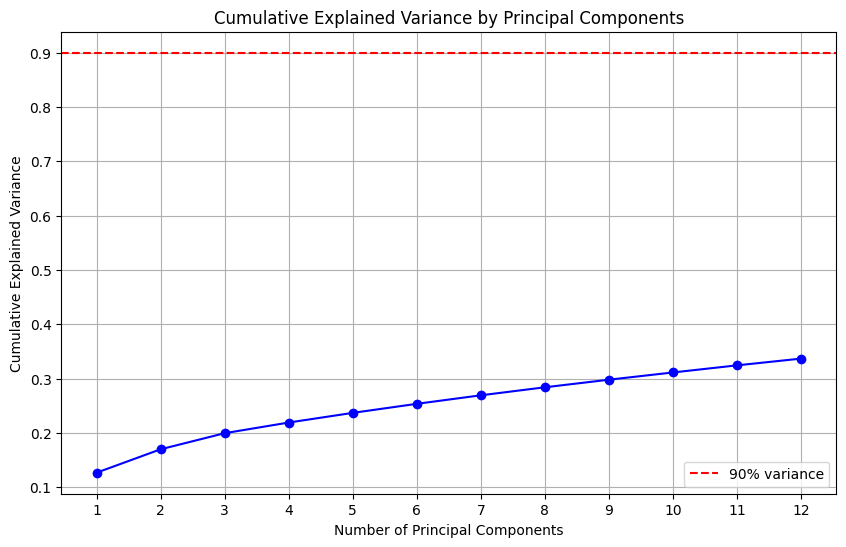

In [ ]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_tfidf_dense)

# Get the cumulative explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-', color='b')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% variance')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_explained_variance) + 1))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_pca.shape

(135, 12)

In [ ]:
df1 =df

In [ ]:
df1

,id,text,lemmatized_text
0,1,leveraging clustering techniques for enhanced ...,leveraging clustering technique for enhanced d...
1,2,virus propagation and their far reaching impli...,virus propagation and their far reaching impli...
2,3,explainable reinforcement learning for financi...,explainable reinforcement learning for financi...
3,4,graph neural networks without training harnes...,graph neural network without training harnessi...
4,5,collaborative clothing segmentation and identi...,collaborative clothing segmentation and identi...
...,...,...,...
130,131,enhancing disentanglement through learned aggr...,enhancing disentanglement through learned aggr...
131,132,analyzing fermentation patterns with multi mod...,analyzing fermentation pattern with multi moda...
132,133,discontinuous constituent parsing as sequence ...,discontinuous constituent parsing a sequence l...
133,134,unraveling the enigmatic parallels between dna...,unraveling the enigmatic parallel between dna ...


In [ ]:
import pandas as pd
import re

def count_math_terms(text):
    # Matches numbers, mathematical symbols, Greek letters, and functions
    math_pattern = r'\d+|[\+\-\*/\^=⟨⟩∥≥≤±→∑∫∇]|(?:sin|cos|tan|log|exp)|[α-ωΑ-Ω]'
    # Find all matches and return their count
    return len(re.findall(math_pattern, text))

df1['contains_math'] = df1['text'].apply(count_math_terms)
df1

,id,text,lemmatized_text,contains_math
0,1,leveraging clustering techniques for enhanced ...,leveraging clustering technique for enhanced d...,122
1,2,virus propagation and their far reaching impli...,virus propagation and their far reaching impli...,336
2,3,explainable reinforcement learning for financi...,explainable reinforcement learning for financi...,126
3,4,graph neural networks without training harnes...,graph neural network without training harnessi...,339
4,5,collaborative clothing segmentation and identi...,collaborative clothing segmentation and identi...,154
...,...,...,...,...
130,131,enhancing disentanglement through learned aggr...,enhancing disentanglement through learned aggr...,140
131,132,analyzing fermentation patterns with multi mod...,analyzing fermentation pattern with multi moda...,161
132,133,discontinuous constituent parsing as sequence ...,discontinuous constituent parsing a sequence l...,279
133,134,unraveling the enigmatic parallels between dna...,unraveling the enigmatic parallel between dna ...,257


In [ ]:
def word_repetition_ratio(text):
    words = text.lower().split()
    total_words = len(words)
    unique_words = len(set(words))
    # Calculate WRR, handling zero word case
    if total_words == 0:
        return 0
    return (total_words - unique_words) / total_words


df1['word_repetition_ratio'] = df1['text'].apply(word_repetition_ratio)

In [ ]:
df1

,id,text,lemmatized_text,contains_math,word_repetition_ratio
0,1,leveraging clustering techniques for enhanced ...,leveraging clustering technique for enhanced d...,122,0.586336
1,2,virus propagation and their far reaching impli...,virus propagation and their far reaching impli...,336,0.830366
2,3,explainable reinforcement learning for financi...,explainable reinforcement learning for financi...,126,0.674738
3,4,graph neural networks without training harnes...,graph neural network without training harnessi...,339,0.790832
4,5,collaborative clothing segmentation and identi...,collaborative clothing segmentation and identi...,154,0.649212
...,...,...,...,...,...
130,131,enhancing disentanglement through learned aggr...,enhancing disentanglement through learned aggr...,140,0.642454
131,132,analyzing fermentation patterns with multi mod...,analyzing fermentation pattern with multi moda...,161,0.687094
132,133,discontinuous constituent parsing as sequence ...,discontinuous constituent parsing a sequence l...,279,0.734650
133,134,unraveling the enigmatic parallels between dna...,unraveling the enigmatic parallel between dna ...,257,0.852972


In [ ]:
!pip install textstat
import re
import pandas as pd
from nltk.corpus import wordnet, stopwords
from nltk import WordNetLemmatizer, word_tokenize, pos_tag
from textstat import flesch_kincaid_grade, gunning_fog # importing textstat here
from collections import Counter
import nltk
import nltk
import re
import pandas as pd
from nltk.corpus import wordnet, stopwords
from nltk import WordNetLemmatizer, word_tokenize, pos_tag
from textstat import flesch_kincaid_grade, gunning_fog
from collections import Counter
import nltk
import nltk

# Before using word_tokenize, download the 'punkt_tab' data
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
### Complex Word Ratio
def complex_word_ratio(text):
    words = word_tokenize(text)
    complex_words = [word for word in words if len(re.findall(r'[aeiouAEIOU]', word)) > 2]
    return len(complex_words) / len(words) if words else 0

In [ ]:
def cohesive_conjunction_count(text):
    cohesive_words = {"however", "moreover", "therefore", "thus", "hence", "nevertheless","might","could","believe"}
    words = word_tokenize(text.lower())
    return sum(1 for word in words if word in cohesive_words)

In [ ]:
def extract_features(text):
    features = {
        "complex_word_ratio": complex_word_ratio(text),
        "cohesive_conjunction_count": cohesive_conjunction_count(text)
    }
    # Unpack the readability scores and merge them into the same dictionary
    return features

In [ ]:
features_df = df1['lemmatized_text'].apply(lambda x: pd.Series(extract_features(x)))

df1 = pd.concat([df1, features_df], axis=1)

df1

,id,text,lemmatized_text,contains_math,word_repetition_ratio,complex_word_ratio,cohesive_conjunction_count
0,1,leveraging clustering techniques for enhanced ...,leveraging clustering technique for enhanced d...,122,0.586336,0.304734,5.0
1,2,virus propagation and their far reaching impli...,virus propagation and their far reaching impli...,336,0.830366,0.317193,23.0
2,3,explainable reinforcement learning for financi...,explainable reinforcement learning for financi...,126,0.674738,0.357459,10.0
3,4,graph neural networks without training harnes...,graph neural network without training harnessi...,339,0.790832,0.230643,13.0
4,5,collaborative clothing segmentation and identi...,collaborative clothing segmentation and identi...,154,0.649212,0.273341,4.0
...,...,...,...,...,...,...,...
130,131,enhancing disentanglement through learned aggr...,enhancing disentanglement through learned aggr...,140,0.642454,0.271994,3.0
131,132,analyzing fermentation patterns with multi mod...,analyzing fermentation pattern with multi moda...,161,0.687094,0.341222,7.0
132,133,discontinuous constituent parsing as sequence ...,discontinuous constituent parsing a sequence l...,279,0.734650,0.247300,10.0
133,134,unraveling the enigmatic parallels between dna...,unraveling the enigmatic parallel between dna ...,257,0.852972,0.260736,7.0


In [ ]:
import pandas as pd
import re

# Function to extract conclusion section and calculate its length
def extract_conclusion(text):
    # Search for the 'conclusion' section keyword using case-insensitive regex
    match = re.search(r"(conclusion[s]*[\s\n]*:*)", text, re.IGNORECASE)
    if match:
        # Extract text after the keyword
        conclusion_start = match.end()
        conclusion_text = text[conclusion_start:].strip()
        return conclusion_text
    else:
        # If no match, return an empty string (no conclusion found)
        return ""

# Function to calculate conclusion length ratio
def conclusion_length_ratio(text):
    conclusion_text = extract_conclusion(text)
    total_words = len(text.split())
    conclusion_words = len(conclusion_text.split())

    # If no conclusion is detected, return 0
    if conclusion_words == 0:
        return 0
    return conclusion_words / total_words if total_words > 0 else 0

# Feature extraction function
def extract_features(text):
    conclusion_text = extract_conclusion(text)
    return {
        "conclusion_length_ratio": conclusion_length_ratio(text)    }



# Apply the feature extraction to the dataframe
features_df = df1['text'].apply(lambda x: pd.Series(extract_features(x)))
df1 = pd.concat([df1, features_df], axis=1)
df1

,id,text,lemmatized_text,contains_math,word_repetition_ratio,complex_word_ratio,cohesive_conjunction_count,conclusion_length_ratio
0,1,leveraging clustering techniques for enhanced ...,leveraging clustering technique for enhanced d...,122,0.586336,0.304734,5.0,0.066066
1,2,virus propagation and their far reaching impli...,virus propagation and their far reaching impli...,336,0.830366,0.317193,23.0,0.363594
2,3,explainable reinforcement learning for financi...,explainable reinforcement learning for financi...,126,0.674738,0.357459,10.0,0.101291
3,4,graph neural networks without training harnes...,graph neural network without training harnessi...,339,0.790832,0.230643,13.0,0.021268
4,5,collaborative clothing segmentation and identi...,collaborative clothing segmentation and identi...,154,0.649212,0.273341,4.0,0.039414
...,...,...,...,...,...,...,...,...
130,131,enhancing disentanglement through learned aggr...,enhancing disentanglement through learned aggr...,140,0.642454,0.271994,3.0,0.000000
131,132,analyzing fermentation patterns with multi mod...,analyzing fermentation pattern with multi moda...,161,0.687094,0.341222,7.0,0.146720
132,133,discontinuous constituent parsing as sequence ...,discontinuous constituent parsing a sequence l...,279,0.734650,0.247300,10.0,0.022992
133,134,unraveling the enigmatic parallels between dna...,unraveling the enigmatic parallel between dna ...,257,0.852972,0.260736,7.0,0.363426


In [ ]:
X_pca_df = pd.DataFrame(X_pca)


In [ ]:
merged = pd.concat([df1, X_pca_df], axis=1)

In [ ]:
merged

,id,text,lemmatized_text,contains_math,word_repetition_ratio,complex_word_ratio,cohesive_conjunction_count,conclusion_length_ratio,0,1,2,3,4,5,6,7,8,9,10,11
0,1,leveraging clustering techniques for enhanced ...,leveraging clustering technique for enhanced d...,122,0.586336,0.304734,5.0,0.066066,-8.004000,-1.837498,3.006804,1.093079,-7.422068,3.693205,-1.117681,3.605249,-5.379460,2.109879,1.764694,-2.148458
1,2,virus propagation and their far reaching impli...,virus propagation and their far reaching impli...,336,0.830366,0.317193,23.0,0.363594,20.621259,-8.120795,2.978862,0.843538,-0.942473,-1.312663,-0.713262,1.368941,-1.410145,0.186296,-0.047825,-0.823386
2,3,explainable reinforcement learning for financi...,explainable reinforcement learning for financi...,126,0.674738,0.357459,10.0,0.101291,12.156395,14.210534,-2.741407,-4.567543,-4.439656,2.023377,-2.362153,1.872747,1.627304,-2.015756,0.450881,7.796220
3,4,graph neural networks without training harnes...,graph neural network without training harnessi...,339,0.790832,0.230643,13.0,0.021268,-8.051070,-2.451064,-0.364539,-0.453288,1.027988,1.837275,-1.574017,-1.653967,2.265160,-0.835521,-4.273546,-0.424430
4,5,collaborative clothing segmentation and identi...,collaborative clothing segmentation and identi...,154,0.649212,0.273341,4.0,0.039414,-7.357686,-0.465641,1.429477,3.378106,-3.052338,4.204627,1.438676,-0.310320,-0.898085,0.054918,1.957372,-1.944821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,enhancing disentanglement through learned aggr...,enhancing disentanglement through learned aggr...,140,0.642454,0.271994,3.0,0.000000,-10.261742,-4.169685,0.133582,-1.391204,-1.909304,3.955438,0.512617,-2.852821,0.068594,0.023268,1.419470,2.830617
131,132,analyzing fermentation patterns with multi mod...,analyzing fermentation pattern with multi moda...,161,0.687094,0.341222,7.0,0.146720,12.774930,10.755253,-5.938423,-8.853878,3.239403,-1.666746,0.756170,1.566913,-3.858155,-1.695792,5.713405,-4.632554
132,133,discontinuous constituent parsing as sequence ...,discontinuous constituent parsing a sequence l...,279,0.734650,0.247300,10.0,0.022992,-8.646190,-5.165268,-4.720192,-2.903123,2.153205,0.627947,-1.988668,-4.058159,2.368668,0.864173,-2.777463,-2.170215
133,134,unraveling the enigmatic parallels between dna...,unraveling the enigmatic parallel between dna ...,257,0.852972,0.260736,7.0,0.363426,20.749932,-13.596913,0.256720,4.135326,12.321675,4.381296,-1.546960,-4.866767,-11.162939,-0.014853,1.321495,-0.074809


In [ ]:
# List of numerical columns you want to standardize
numerical_columns = ['contains_math', 'word_repetition_ratio', 'complex_word_ratio',
                     'cohesive_conjunction_count', 'conclusion_length_ratio']  # Use integers for column names if needed

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numerical columns
merged[numerical_columns] = scaler.fit_transform(merged[numerical_columns])

In [ ]:
merged

,id,text,lemmatized_text,contains_math,word_repetition_ratio,complex_word_ratio,cohesive_conjunction_count,conclusion_length_ratio,0,1,2,3,4,5,6,7,8,9,10,11
0,1,leveraging clustering techniques for enhanced ...,leveraging clustering technique for enhanced d...,-0.802497,-1.911676,-0.040170,-0.626904,-0.598997,-8.004000,-1.837498,3.006804,1.093079,-7.422068,3.693205,-1.117681,3.605249,-5.379460,2.109879,1.764694,-2.148458
1,2,virus propagation and their far reaching impli...,virus propagation and their far reaching impli...,0.117947,1.135404,0.198439,1.005869,0.444327,20.621259,-8.120795,2.978862,0.843538,-0.942473,-1.312663,-0.713262,1.368941,-1.410145,0.186296,-0.047825,-0.823386
2,3,explainable reinforcement learning for financi...,explainable reinforcement learning for financi...,-0.785292,-0.807853,0.969546,-0.173356,-0.475475,12.156395,14.210534,-2.741407,-4.567543,-4.439656,2.023377,-2.362153,1.872747,1.627304,-2.015756,0.450881,7.796220
3,4,graph neural networks without training harnes...,graph neural network without training harnessi...,0.130850,0.641761,-1.459059,0.098773,-0.756089,-8.051070,-2.451064,-0.364539,-0.453288,1.027988,1.837275,-1.574017,-1.653967,2.265160,-0.835521,-4.273546,-0.424430
4,5,collaborative clothing segmentation and identi...,collaborative clothing segmentation and identi...,-0.664860,-1.126583,-0.641362,-0.717614,-0.692455,-7.357686,-0.465641,1.429477,3.378106,-3.052338,4.204627,1.438676,-0.310320,-0.898085,0.054918,1.957372,-1.944821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,131,enhancing disentanglement through learned aggr...,enhancing disentanglement through learned aggr...,-0.725076,-1.210968,-0.667163,-0.808323,-0.830667,-10.261742,-4.169685,0.133582,-1.391204,-1.909304,3.955438,0.512617,-2.852821,0.068594,0.023268,1.419470,2.830617
131,132,analyzing fermentation patterns with multi mod...,analyzing fermentation pattern with multi moda...,-0.634752,-0.653560,0.658605,-0.445485,-0.316174,12.774930,10.755253,-5.938423,-8.853878,3.239403,-1.666746,0.756170,1.566913,-3.858155,-1.695792,5.713405,-4.632554
132,133,discontinuous constituent parsing as sequence ...,discontinuous constituent parsing a sequence l...,-0.127218,-0.059761,-1.140054,-0.173356,-0.750044,-8.646190,-5.165268,-4.720192,-2.903123,2.153205,0.627947,-1.988668,-4.058159,2.368668,0.864173,-2.777463,-2.170215
133,134,unraveling the enigmatic parallels between dna...,unraveling the enigmatic parallel between dna ...,-0.221843,1.417674,-0.882753,-0.445485,0.443739,20.749932,-13.596913,0.256720,4.135326,12.321675,4.381296,-1.546960,-4.866767,-11.162939,-0.014853,1.321495,-0.074809


In [ ]:
# prompt: drop column named text

merged = merged.drop('text', axis=1)

In [ ]:
test_data = merged

In [ ]:
test_data

In [ ]:
import pandas

In [ ]:

import pandas as pd

df = pd.read_csv('/content/predictions_revised (1).csv')



In [ ]:
df

,text,pred
1,leveraging clustering technique enhanced drone...,1
2,virus propagation far reaching implication anc...,0
3,explainable reinforcement learning financial m...,0
4,graph neural network without training harnessi...,1
5,collaborative clothing segmentation identifica...,1
...,...,...
131,enhancing disentanglement learned aggregation ...,1
132,analyzing fermentation pattern multi modal tra...,0
133,discontinuous constituent parsing sequence lab...,1
134,unraveling enigmatic parallel dna helical stru...,0


In [ ]:
df.reset_index(inplace=True)


In [ ]:
df

,index,text,pred
0,1,leveraging clustering technique enhanced drone...,1
1,2,virus propagation far reaching implication anc...,0
2,3,explainable reinforcement learning financial m...,0
3,4,graph neural network without training harnessi...,1
4,5,collaborative clothing segmentation identifica...,1
...,...,...,...
130,131,enhancing disentanglement learned aggregation ...,1
131,132,analyzing fermentation pattern multi modal tra...,0
132,133,discontinuous constituent parsing sequence lab...,1
133,134,unraveling enigmatic parallel dna helical stru...,0


In [ ]:
# prompt: rename index column to Paper_ID

df = df.rename(columns={'index': 'Paper_ID'})
df

,Paper_ID,text,pred
0,1,leveraging clustering technique enhanced drone...,1
1,2,virus propagation far reaching implication anc...,0
2,3,explainable reinforcement learning financial m...,0
3,4,graph neural network without training harnessi...,1
4,5,collaborative clothing segmentation identifica...,1
...,...,...,...
130,131,enhancing disentanglement learned aggregation ...,1
131,132,analyzing fermentation pattern multi modal tra...,0
132,133,discontinuous constituent parsing sequence lab...,1
133,134,unraveling enigmatic parallel dna helical stru...,0


In [ ]:
# prompt:

import pandas as pd

# Load the conference recommendations
recommendations = pd.read_csv('/content/conference_recommendations.csv')


In [ ]:
recommendations

,Paper_ID,Assigned_Conference,Justification
0,1,cvpr,Assigned to cvpr due to high similarity in top...
1,4,neurips,Assigned to neurips due to high similarity in ...
2,5,cvpr,Assigned to cvpr due to high similarity in top...
3,7,emnlp,Assigned to emnlp due to high similarity in to...
4,8,neurips,Assigned to neurips due to high similarity in ...
...,...,...,...
95,127,neurips,Assigned to neurips due to high similarity in ...
96,128,emnlp,Assigned to emnlp due to high similarity in to...
97,131,neurips,Assigned to neurips due to high similarity in ...
98,133,emnlp,Assigned to emnlp due to high similarity in to...


In [ ]:
# prompt: concatenate  recommendations and df by col=Paper_ID

# Concatenate recommendations and df by col=Paper_ID
merged_df = pd.merge(df,recommendations, on='Paper_ID', how='left')
merged_df

,Paper_ID,text,pred,Assigned_Conference,Justification
0,1,leveraging clustering technique enhanced drone...,1,cvpr,Assigned to cvpr due to high similarity in top...
1,2,virus propagation far reaching implication anc...,0,NaN,NaN
2,3,explainable reinforcement learning financial m...,0,NaN,NaN
3,4,graph neural network without training harnessi...,1,neurips,Assigned to neurips due to high similarity in ...
4,5,collaborative clothing segmentation identifica...,1,cvpr,Assigned to cvpr due to high similarity in top...
...,...,...,...,...,...
130,131,enhancing disentanglement learned aggregation ...,1,neurips,Assigned to neurips due to high similarity in ...
131,132,analyzing fermentation pattern multi modal tra...,0,NaN,NaN
132,133,discontinuous constituent parsing sequence lab...,1,emnlp,Assigned to emnlp due to high similarity in to...
133,134,unraveling enigmatic parallel dna helical stru...,0,NaN,NaN


In [ ]:
# prompt: rename col=pred by Publishable

merged_df = merged_df.rename(columns={'Justification': 'Rationale'})

In [ ]:
merged_df=merged_df.drop(columns='text')

In [ ]:
merged_df

,Paper_ID,Publishable,Conference,Rationale
0,1,1,cvpr,Assigned to cvpr due to high similarity in top...
1,2,0,NaN,NaN
2,3,0,NaN,NaN
3,4,1,neurips,Assigned to neurips due to high similarity in ...
4,5,1,cvpr,Assigned to cvpr due to high similarity in top...
...,...,...,...,...
130,131,1,neurips,Assigned to neurips due to high similarity in ...
131,132,0,NaN,NaN
132,133,1,emnlp,Assigned to emnlp due to high similarity in to...
133,134,0,NaN,NaN


In [ ]:
# prompt: write csv

merged_df.to_csv('results.csv', index=False)